
# Week 1 Lab – Regression and cloud ready AI infrastructure Part N°1
## David Santiago Castro Sierra

In this lab we will work with a very simple version of supervised learning:

- Our data consists of pairs $(M^{(i)}, L^{(i)})$, where $M^{(i)}$ is one feature and $L^{(i)}$ is the target.
- M: stellar mass (in units of solar mass, M)
- L: stellar luminosity (in units of solar luminosity, L)
- We will use a **linear regression model** with one feature.
- We will use a **cost function** based on mean squared error.
- We will train the model with **gradient descent**.
- In all code, we will avoid NumPy vectorization and use **explicit Python loops**.




## 0. Theory Refresher

### 0.1 Linear Regression (One Feature)

We assume there is (approximately) a linear relationship between the input $M$ and the output $L$.  
Our model (or hypothesis) is a function that depends on the parameters $w$ and $b$:

$$
f_{w,b}(M) = wM + b
$$

- $w$ is the **slope**: how much $f_{w,b}(M)$ changes when $M$ increases by 1.
- $b$ is the **intercept**: the value of $f_{w,b}(M)$ when $M = 0$.
- For a dataset with $n$ examples, we write the $i$-th example as $(M^{(i)}, L^{(i)})$.  
  The prediction for that example is:
  $$
  \hat{L}^{(i)} = f_{w,b}(M^{(i)}) = w M^{(i)} + b
  $$



### 0.2 Cost Function (Mean Squared Error)

We need a way to measure how well a particular line (given by $w$ and $b$) fits the data.

We use the **mean squared error (MSE)** cost function:

$$
J(w,b) = \frac{1}{2n} \sum_{i=1}^{n} \big( \hat{L}^{(i)} - L^{(i)} \big)^2
       = \frac{1}{2n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big)^2
$$

- The term $(\hat{L}^{(i)} - L^{(i)})$ is the **error** for example $i$.
- We square the error so that positive and negative errors do not cancel out, and to penalize large errors more.
- The factor $\frac{1}{2n}$ is for mathematical convenience when taking derivatives.

Our goal is to find values of $w$ and $b$ that **minimize** $J(w,b)$.



### 0.3 Gradient Descent

To minimize $J(w,b)$, we use **gradient descent**.  
The idea is to start with some initial $(w,b)$ and repeatedly update them in the direction that decreases the cost.

We compute the partial derivatives:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big) M^{(i)}
$$

$$
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big)
$$

Given a **learning rate** $\alpha > 0$, we update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \qquad
b := b - \alpha \frac{\partial J}{\partial b}
$$

We repeat these updates many times. If $\alpha$ is chosen well, the cost $J(w,b)$ will decrease and $(w,b)$ will move toward values that fit the data.


## Setup

In [101]:

# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [102]:

import numpy as np
import matplotlib.pyplot as plt



## Load a Simple Dataset

We will load a synthetic dataset that roughly follows a linear relationship:

$$
L \approx w M + b
$$

Each point is a pair $(M^{(i)}, L^{(i)})$ with **one feature** $M^{(i)}$.


In [103]:

M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

n = len(M)

print(f"Number of examples n = {n}")
print("First 5 M values:", M[:5])
print("First 5 L values:", L[:5])

Number of examples n = 10
First 5 M values: [0.6, 0.8, 1.0, 1.2, 1.4]
First 5 L values: [0.15, 0.35, 1.0, 2.3, 4.1]


### 1. Dataset visualization
We wait for data so that the graph allows us to approximate the data with a straight line, taking into account that not all the data will be contained in that straight line and there will be error.

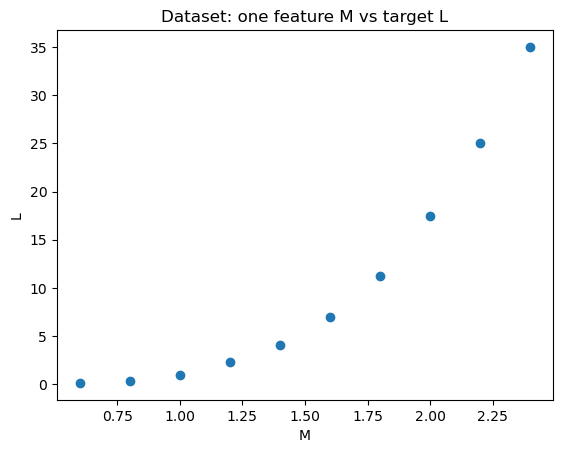

In [104]:

plt.figure()
plt.scatter(M, L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Dataset: one feature M vs target L")
plt.show()



## 2. Model and loss

We use the model (hypothesis function):

$$
f_{w,b}(M^{(i)}) = w M^{(i)} + b
$$

where:
- $w$ is the slope,
- $b$ is the intercept.


In [105]:

def predict(M_list, w, b):
    """Compute predicted L values for a list of M, using f_{w,b}(M) = w M + b."""
    L_hat_list = []
    for i in range(len(M_list)):
        L_hat_list.append(w * M_list[i] + b)
    return L_hat_list
w_test = 0
b_test = 0
L_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", L_hat_test[:5])

First 5 predictions with w=0, b=0: [0.0, 0.0, 0.0, 0.0, 0.0]



We define the **mean squared error** cost function:

$$
J(w,b) = \frac{1}{2n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big)^2
$$

This measures how well the model $f_{w,b}(x) = w M + b$ fits the data.


In [106]:

def compute_cost(M_list, L_list, w, b):
    """Compute the cost J(w,b) using explicit loops."""
    m_local = len(M_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * M_list[i] + b
        diff = f_wb - L_list[i]
        total += diff * diff
    cost = total / (2 * m_local)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))


Cost with w=0, b=0: 117.69675



### 3. Cost surface

We can visualize how $J(w,b)$ changes as we vary $w$ and $b$.  
Below we plot the **cost surface** $J(w,b)$ in 3D.


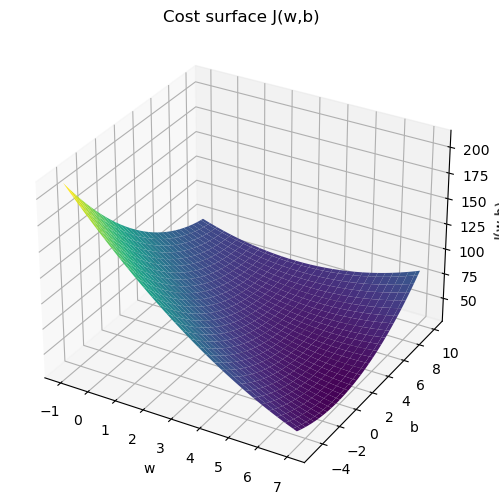

In [107]:

from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D projection
from matplotlib import cm

# Choose reasonable ranges around the expected optimum
w_values = [float(v) for v in np.linspace(-1.0, 7.0, 60)]
b_values = [float(v) for v in np.linspace(-5.0, 10.0, 60)]

# Build W, B, J_vals as lists of lists using explicit loops
W = []
B = []
J_vals = []

for i in range(len(b_values)):  # rows: b
    row_W = []
    row_B = []
    row_J = []
    for j in range(len(w_values)):  # cols: w
        w_curr = w_values[j]
        b_curr = b_values[i]
        row_W.append(w_curr)
        row_B.append(b_curr)
        j_val = compute_cost(M, L, w_curr, b_curr)
        row_J.append(j_val)
    W.append(row_W)
    B.append(row_B)
    J_vals.append(row_J)

W_arr = np.array(W)
B_arr = np.array(B)
J_arr = np.array(J_vals)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W_arr, B_arr, J_arr, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()


The minimum point on this surface corresponds to the best-fitting parameters in the explored grid


## 4. Gradient Descent

We use **gradient descent** with the update rules:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big) M^{(i)}, \quad
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(M^{(i)}) - L^{(i)} \big)
$$

Update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$


## 5. Gradient descent (non-vectorized)

In [108]:

def compute_gradients(M_list, L_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(M_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * M_list[i] + b
        error = f_wb - L_list[i]
        sum_dw += error * M_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients at w=0, b=0: -21.523000000000003 -10.36


### 5.1 Implement the Gradient Descent Loop

In [109]:

def gradient_descent(M_list, L_list, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M_list, L_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M_list, L_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.001

num_iterations = 1000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration  100: w= 1.8528, b= 0.8539, cost= 76.1380
Iteration  200: w= 3.1775, b= 1.3941, cost= 55.5054
Iteration  300: w= 4.1445, b= 1.7209, cost= 45.0036
Iteration  400: w= 4.8589, b= 1.8976, cost= 39.5456
Iteration  500: w= 5.3949, b= 1.9691, cost= 36.6010
Iteration  600: w= 5.8048, b= 1.9668, cost= 34.9110
Iteration  700: w= 6.1253, b= 1.9130, cost= 33.8494
Iteration  800: w= 6.3826, b= 1.8233, cost= 33.1044
Iteration  900: w= 6.5950, b= 1.7088, cost= 32.5210

Learned parameters:
w = 6.7737785583999575
b = 1.5787460037920253


## 6. Gradient descent (vectorized)

In [110]:

def compute_gradients(M_list, L_list, w, b):
    n = len(M_list)
    y_hat = w * np.array(M_list) + b  # f_{w,b}(x)
    errors = y_hat - np.array(L_list)

    dj_dw = (1 / n) * np.sum(errors * np.array(M_list))
    dj_db = (1 / n) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients at w=0, b=0: -21.523 -10.36


### 6.1 Implement the Gradient Descent Loop

In [111]:

def gradient_descent(M_list, L_list, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M_list, L_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M_list, L_list, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.001
num_iterations = 1000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration  100: w= 1.8528, b= 0.8539, cost= 76.1380
Iteration  200: w= 3.1775, b= 1.3941, cost= 55.5054
Iteration  300: w= 4.1445, b= 1.7209, cost= 45.0036
Iteration  400: w= 4.8589, b= 1.8976, cost= 39.5456
Iteration  500: w= 5.3949, b= 1.9691, cost= 36.6010
Iteration  600: w= 5.8048, b= 1.9668, cost= 34.9110
Iteration  700: w= 6.1253, b= 1.9130, cost= 33.8494
Iteration  800: w= 6.3826, b= 1.8233, cost= 33.1044
Iteration  900: w= 6.5950, b= 1.7088, cost= 32.5210

Learned parameters:
w = 6.7737785583999575
b = 1.5787460037920253


### 7. Convergence 

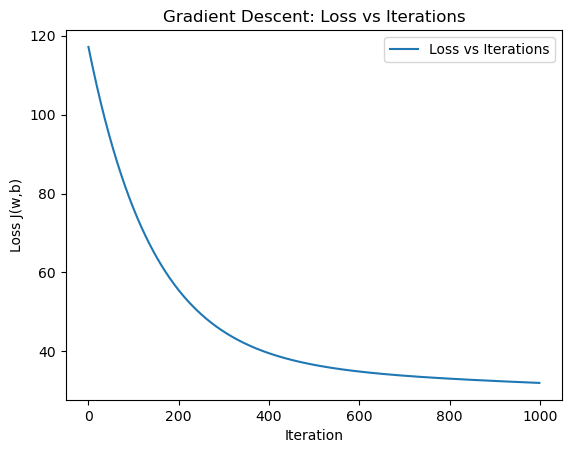

In [112]:
plt.figure()
plt.plot(it_hist, cost_hist, label="Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss J(w,b)")
plt.title("Gradient Descent: Loss vs Iterations")
plt.legend()
plt.show()


At first, there is rapid loss, as the model corrects errors when the derivatives are very high, and begins to stabilize, making the curve a little flatter, bringing us closer to the optimal model, trying to converge to 0.

## 8. Experiments

Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration    1: w= 0.0430, b= 0.0207, cost=116.5615
Iteration    2: w= 0.0644, b= 0.0310, cost=115.9998
Iteration    3: w= 0.0857, b= 0.0412, cost=115.4419
Iteration    4: w= 0.1069, b= 0.0514, cost=114.8879
Iteration    5: w= 0.1281, b= 0.0615, cost=114.3376
Iteration    6: w= 0.1492, b= 0.0716, cost=113.7912
Iteration    7: w= 0.1702, b= 0.0817, cost=113.2486
Iteration    8: w= 0.1912, b= 0.0917, cost=112.7097
Iteration    9: w= 0.2121, b= 0.1017, cost=112.1745
Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration    1: w= 0.4234, b= 0.2029, cost=106.8632
Iteration    2: w= 0.6246, b= 0.2982, cost=101.9913
Iteration    3: w= 0.8193, b= 0.3894, cost= 97.4498
Iteration    4: w= 1.0075, b= 0.4768, cost= 93.2159
Iteration    5: w= 1.1896, b= 0.5605, cost= 89.2687
Iteration    6: w= 1.3657, b= 0.6407, cost= 85.5885
Iteration    7: w= 1.5361, b= 0.7174, cost= 82.1571
Iteration    8: w= 1.7009, b= 0.7908, cost= 78.9573
Iteration   

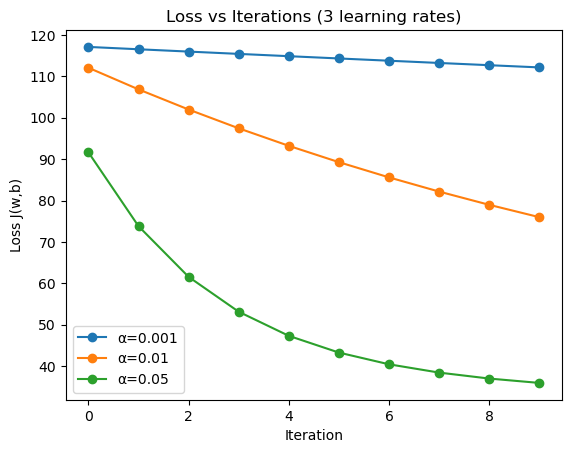

In [113]:

learning_rates = [0.001, 0.01, 0.05]
num_iterations = 10

results_lr = {}

for lr in learning_rates:
    w_temp, b_temp, hist_temp = gradient_descent(M, L, 0.0, 0.0, lr, num_iterations)
    results_lr[lr] = {
        "w": w_temp,
        "b": b_temp,
        "cost_hist": [cost for _, cost in hist_temp]
    }

plt.figure()
for lr in learning_rates:
    cost_hist = np.array(results_lr[lr]["cost_hist"]).reshape(-1)  
    it_hist = np.arange(len(cost_hist))
    plt.plot(it_hist, cost_hist, marker="o", label=f"α={lr}")

plt.xlabel("Iteration")
plt.ylabel("Loss J(w,b)")
plt.title("Loss vs Iterations (3 learning rates)")
plt.legend()
plt.show()


### 9. Final fit plot

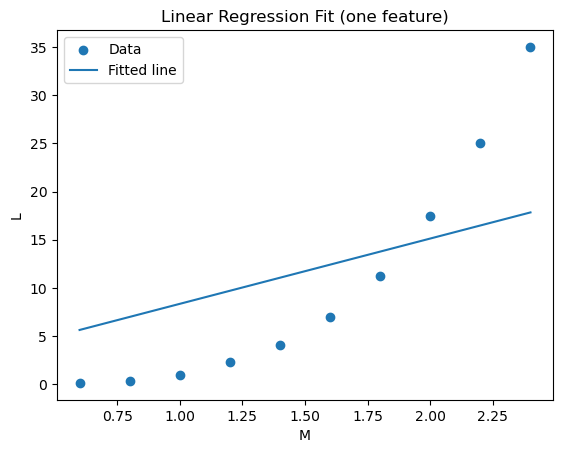

In [114]:

plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, y_pred, label="Fitted line")
plt.xlabel("M")
plt.ylabel("L")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()


We realize that the line does not fit the model, since what we need is a second-degree polynomial model. This shows us the importance of setting up the model correctly, since we can make mistakes in the approach and the error at each point will be very large.

## 10. Conceptual questions

1. astrophysical meaning of w;

It is the rate of change of luminosity with respect to mass, showing us how much the brightness of the star increases for each point of its mass. 

2. Why is a linear model limited here?

Because luminosity grows exponentially, no matter how we draw the line, we will always overestimate or underestimate stars, since the exponential amount of their growth cannot be represented on a straight line. 